In [1]:
import numpy as np
from sklearn import decomposition
from sklearn import linear_model
import matplotlib.pyplot as plt
from collections import OrderedDict
import cv2
import dlib
%matplotlib inline


In [2]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

# Check if a point is inside a rectangle
def rect_contains(rect, point):
    if point[0] < rect[0]:
        return False
    elif point[1] < rect[1]:
        return False
    elif point[0] > rect[2]:
        return False
    elif point[1] > rect[3]:
        return False
    return True

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('data/shape_predictor_68_face_landmarks.dat')

In [4]:
image = cv2.imread('./images/image.jpg')
image = image[:,:,::-1] # not effective but for rendering with matplotlib
size = (500, int(500 * image.shape[1] / image.shape[0]))
image = cv2.resize(image, size)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Locate face position
rects = detector(gray, 1)

In [5]:
subdiv = cv2.Subdiv2D((0, 0, size[1], size[0]))

for rect in rects:

    # get landmarks
    shape = predictor(gray, rect)
    for p in shape.parts():
        subdiv.insert((p.x, p.y))

In [6]:
def draw_delaunay(img, subdiv):
 
    delaunay_color = (0, 0, 255)
    
    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])
 
    for t in triangleList :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
         
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
         
            cv2.line(img, pt1, pt2, delaunay_color, 1)
            cv2.line(img, pt2, pt3, delaunay_color, 1)
            cv2.line(img, pt3, pt1, delaunay_color, 1)

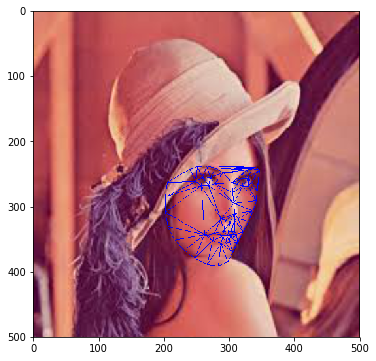

In [7]:
draw_delaunay(image, subdiv)

plt.figure(figsize=(6, 6))
plt.imshow(image)